In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd

# Проверка гипотез

Основные виды критериев при проверке гипотез:
1) Критерии согласия - проверка на соответствие определенному закону распределения (общие или специальные критерии)
2) Критерии значимости - проверка численных параметров известных законов распределения
3) Критерии однородности - проверка значимости различий распределений

По применению:
1) Параметрические - используются только для определенных распределений (более мощные)
2) Непараметрические - могут использоваться при неизвестном распределении

## Критерий Шапиро-Уилко (специальный критерий согласия)
Основан на оптимальной линейной несмещённой оценке дисперсии к её обычной оценке методом максимального правдоподобия и является одним наиболее эффективных критериев проверки нормальности

+ H0 - выборка взята из нормального распределения
+ H1 - выборка взята не из нормального распределения

**st.shapiro(x)** - реализация теста в scipy. Возвращает тестовое значение критерия и p-value.
+ Если тестовое значение критерия приближается к единице и p-value > alpha - принимаем нулевую гипотезу - распределение нормальное. 
+ В обратном случае - p-value < alpha - отвергаем нулевую гипотезу - выборка взята из распределения отличного от нормального

In [2]:
# Критерий Шапиро-Уилко

x = [1,2,2,3,3,3,4,4,4,4,5,5,5,5,5,6,6,6,6,6,6,7,7,7,7,7,8,8,8,8,9,9,9,10,10,11] #нормальное распределение
y = [1,1,1,1,1,1,11,1,1,1,1,1,1,1,11,1,1,1,1,11,1,1,1,11,1,1,11,1,1,1] #отличное от нормального
print(st.shapiro(x))
print(st.shapiro(y))

ShapiroResult(statistic=0.9811134338378906, pvalue=0.7822656035423279)
ShapiroResult(statistic=0.4521617889404297, pvalue=1.732437526769104e-09)


## Критерий Андерсона — Дарлинга (общий критерий согласия)

Классический непараметрический критерий согласия Андерсона — Дарлинга предназначен для проверки простых гипотез о принадлежности анализируемой выборки полностью известному закону

+ H0 - выборка взята из определенного распределения
+ H1 - выборка взята не из определенного распределения

Нулевая гипотеза отклоняется при больших значениях статитистики
***
**st.anderson(x)** - реализация теста в scipy. 

Эта функция работает для нормального, экспоненциального, логистического, распределения Weibull_min или распределения Гамбеля (экстремальное значение, тип I). 

Соответствующие параметры: dist{‘norm’, ‘expon’, ‘logistic’, ‘gumbel’, ‘gumbel_l’, ‘gumbel_r’, ‘extreme1’, ‘weibull_min’}, optional

In [3]:
# Критерий Андерсона - Дарлинга

x = [7,8,2,3,3,8,9,9,4,5,5,5,5,5,5,6,6,8,6,6,6,7,7,7,7,7,8,8,8,8,9,9,3,10,10,10] # приближенно нормальное распределение
print(st.anderson(x, dist='norm'))

# Значение статистики - 0.5374. Далее дается список критических значений для соответствующих 
# уровней значений - для нормального - 15%, 10%, 5%, 2.5%, 1%.
# Смотрим на соответствие значений и сравниваем на каком уровне значение статистики больше критического:
v = st.anderson(x, dist='norm').critical_values
l = st.anderson(x, dist='norm').significance_level
for i,j in zip(v,l):
    print(f' При {j}% уровне значимости критическое значение равно {i}')
# Значение статистики 0.5374 больше чем 0.528, но меньше чем 0.601 -
# следовательно нулевая гипотеза может быть отклонена при 15% уровне значимости, но не при 10% уровне значимости

AndersonResult(statistic=0.537373973495292, critical_values=array([0.528, 0.601, 0.721, 0.841, 1.   ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=6.638888888888889, scale=2.1132612275516283)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
 При 15.0% уровне значимости критическое значение равно 0.528
 При 10.0% уровне значимости критическое значение равно 0.601
 При 5.0% уровне значимости критическое значение равно 0.721
 При 2.5% уровне значимости критическое значение равно 0.841
 При 1.0% уровне значимости критическое значение равно 1.0


## Критерии Стьюдента (параметрический критерий значимости)

Критерий Стьюдента - это общее название для всех критериев, использующих критическое значение t-распределения. Данные критерии параметрически, следовательно могут применятся только к выборкам, которые прошли тесты на нормальность.
Основные варианты применения критерия:

1) Сравнение выборочного среднего с заданным значением
2) Сравнение двух выборочных средних при известных дисперсиях
3) Сравнение двух выборочных средних при неизвестных равных дисперсиях
4) Сравнение двух выборочных средних при неизвестных неравных дисперсиях
5) Сравнение двух выборочных средних в связанных выборках

Варианты реализации тестов в scipy:

1) **st.ttest_1samp** - одновыборочный критерий
2) **st.ttest_ind_from_stats** - критерий для двух несвязанных выборок (по параметрам)
3) **st.ttest_ind** - критерий для двух несвязанных выборок (по выборкам)
4) **st.ttest_rel** - критерий для двух *связанных* выборок


### Одновыборочный критерий Стьюдента 
**st.ttest_1samp** - проверка на соответствие среднего значения заданному
Принимает на вход выборку, ожидаемое среднее и вид альтернативной гипотезы.
Доступны следующие параметры (по умолчанию «двусторонний»): 

1) ‘two-sided’: среднее значение базового распределения выборки отличается от заданного среднего значения совокупности 
2) ‘less’: среднее значение базового распределения выборки меньше заданного среднего значения генеральной совокупности 
3) ‘greater’: среднее значение базового распределения выборки больше, чем заданное среднее значение генеральной совокупности 


In [4]:
# Пример для одностороней критической области

#  H0 - среднее генеральной совокупности равно 6.6
#  H1 - среднее генеральной совокупности больше 6.6

# Устанавливаем уровень значимости alpha = 0.05
# Если p-значение больше alpha - принимается нулевая гипотеза

x = [7,8,2,3,3,8,9,9,4,5,5,5,5,5,5,6,6,8,6,6,6,7,7,7,7,7,8,8,8,8,9,9,3,10,10,10]
print(st.ttest_1samp(x, 1.6, alternative='greater'))
# В данном примере pvalue - значительно меньше, значит с значимостью alpha мы отклоняем нулевую гипотезу и признаем, 
# что истинное среднее значение больше 1.6
# Также данная функция позволяет вычислять доверительный интервал
(st.ttest_1samp(x, 1.6, alternative='greater').confidence_interval(confidence_level=0.95))
# Границы 95% доверительного интервала — это минимальное и максимальное значения параметра предполагаемого среднего, 
# для которых p-значение теста будет равно 0,05.

TtestResult(statistic=14.306481820215346, pvalue=1.721261821954474e-16, df=35)


ConfidenceInterval(low=6.043804229205406, high=inf)

### Критерий Стьюдента для несвязанных выборок

Это проверка нулевой гипотезы о том, что две независимые выборки имеют одинаковые средние (ожидаемые) значения. Этот тест предполагает, что выборки по умолчанию имеют одинаковые дисперсии (следовательно и объемы выборок равны). Но у реализации этих тестов есть параметр *equal_var* по умолчанию = True, то есть его можно установить как False и сравнивать среднии выборок с неравными дисперсиями и объемами выборок

Варианты реализации тестов в scipy:

+ **scipy.stats.ttest_ind** - принимает на вход выборку
+ **scipy.stats.ttest_ind_from_stats** - принимает на вход параметры выборки

Доступны следующие параметры (по умолчанию «двусторонний»): 

1) ‘two-sided’: средние значения распределений, лежащих в основе выборок, неравны 
2) ‘less’: среднее значение распределения, лежащего в основе первой выборки, меньше среднего значения распределения, лежащего в основе второй выборки
3) ‘greater’: среднее значение распределения, лежащего в основе первой выборки, больше, чем среднее значение распределения, лежащего в основе второй выборки


In [5]:
# Примеры 
rng = np.random.default_rng() # генератор рандома
#  H0 - средние генеральных совокупностей равны   
#  H1 - средние генеральных совокупностей неравны
# Если p-значение больше alpha - принимается нулевая гипотеза

rvs1 = st.norm.rvs(loc=5, scale=10, size=500, random_state=rng) #рандомная выборка
rvs2 = st.norm.rvs(loc=5, scale=10, size=500, random_state=rng) #вторая рандомная выборка с такими же параметрами
rvs3 = st.norm.rvs(loc=5, scale=30, size=500, random_state=rng) #третья рандомная выборка с большей дисперсией
print('Статистика и p-value для равных выборок с равной дисперсией', st.ttest_ind(rvs1, rvs2))
print('p-value > alpha принимаем нулевую гипотезу о равенстве средних')

# Применяем тест с равными дисперсиями для выборок у которых они на самом деле не равны
print('Статистика и p-value для равных выборок с неравной дисперсией - неверный тест', st.ttest_ind(rvs1, rvs3))
# Добавляем факт неравенства дисперсий
print('Статистика и p-value для равных выборок с неравной дисперсией - верный тест', st.ttest_ind(rvs1, rvs3, equal_var=False))

# Функция **scipy.stats.ttest_ind_from_stats** работает точно также только на вход принимает параметры выборки
a = np.array([1, 3, 4, 6, 11, 13, 15, 19, 22, 24, 25, 26, 26])
b = np.array([2, 4, 6, 9, 11, 13, 14, 15, 18, 19, 21])
st.ttest_ind_from_stats(mean1=15.0, std1=np.sqrt(87.5), nobs1=13,
                     mean2=12.0, std2=np.sqrt(39.0), nobs2=11, equal_var=False)

Статистика и p-value для равных выборок с равной дисперсией Ttest_indResult(statistic=0.8145617913384573, pvalue=0.41551751298630757)
p-value > alpha принимаем нулевую гипотезу о равенстве средних
Статистика и p-value для равных выборок с неравной дисперсией - неверный тест Ttest_indResult(statistic=1.0038980187086552, pvalue=0.3156711094092286)
Статистика и p-value для равных выборок с неравной дисперсией - верный тест Ttest_indResult(statistic=1.0038980187086552, pvalue=0.31582320831576777)


Ttest_indResult(statistic=0.9358461935556048, pvalue=0.35999818693244245)

### Критерий Стьюдента для связанных выборок

Рассчитывает t-критерий для *двух связанных* выборок оценок, a и b. Это проверка нулевой гипотезы о том, что две связанные или повторяющиеся выборки имеют одинаковые средние (ожидаемые) значения. Альтернативная гипотеза также может быть сформулирована в трех вариантах.

Применяется при использовании повторных выборкок из одних и тех же единиц. Тест измеряет, значительно ли различается среднее по выборкам. Если мы наблюдаем большое значение p, то мы не можем отвергнуть нулевую гипотезу об равных средних.
Если p-значение меньше порогового значения, то мы отвергаем нулевую гипотезу о равных средних. Небольшие p-значения связаны с большими t-статистиками. 


In [6]:
# Пример абсолютно такой же

rvs1 = st.norm.rvs(loc=5, scale=10, size=500, random_state=rng) #рандомная выборка
rvs2 = st.norm.rvs(loc=5, scale=10, size=500, random_state=rng) #вторая рандомная выборка с такими же параметрами
st.ttest_rel(rvs1, rvs2)
print('p-value больше alpha - нет оснований отвергнуть нулевую гипотезу о равенстве')

p-value больше alpha - нет оснований отвергнуть нулевую гипотезу о равенстве


## Парные непараметрические тесты

Непараметрические тесты применяются в случае, если выборка взята из распределения отличного от нормального, если признак измерен в количественной или порядковой шкале. Критерии являются ранговыми, т.е. инвариантными по отношению к любому монотонному преобразованию шкалы измерения

Варианты реализации тестов в scipy:х

+ **scipy.stats.mannwhitneyu** - для независимых выборок
+ **scipy.stats.wilcoxon** - для связанных выборок

Вычислите критерий знакового ранга Уилкоксона. Критерий знакового ранга Уилкоксона проверяет нулевую гипотезу о том, что две связанные парные выборки происходят из одного и того же распределения. В частности, он проверяет, является ли распределение разностей x-y симметричным относительно нуля. Это непараметрическая версия парного(связанного) Т-теста.

### Критерий Манна-Уитни

U-критерий Манна-Уитни — это непараметрический тест нулевой гипотезы о том, что распределение, лежащее в основе выборки x, совпадает с распределением, лежащим в основе выборки y

Реализация в scipy:
+ **scipy.stats.mannwhitneyu**

Имеются следующие вариации методов использования критерия - method{‘auto’, ‘asymptotic’, ‘exact’}, optional.
Критическая область также определяется тремя вариантами, аналогично t-тесту

In [7]:
#  H0 - случайные величины распределены одинаково
#  H1 - распределение, лежащее в основе x, стохастически меньше, чем распределение,
# лежащее в основе y, т. Е. F (u)> G (u) для всех u.

males = [19, 22, 16, 29, 24]
females = [20, 11, 17, 12]
print(st.mannwhitneyu(males, females, method="exact", alternative="less"))
# p-value больше alpha - принимаем нулевую гипотезу о равенстве
# А если критическую обдасть сделать двухсторонней
print(st.mannwhitneyu(males, females, method="exact"))

MannwhitneyuResult(statistic=17.0, pvalue=0.9682539682539684)
MannwhitneyuResult(statistic=17.0, pvalue=0.1111111111111111)


### Критерий Уилкоксона

Критерий знакового ранга Уилкоксона проверяет нулевую гипотезу о том, что две связанные парные выборки происходят из одного и того же распределения. В частности, он проверяет, является ли распределение разностей x-y симметричным относительно нуля. Это непараметрическая версия парного t-теста. В такой реализации он представлен в skipy, в теории есть и другие разновидности

Реализация в scipy:
+ **scipy.stats.wilcoxon**

На вход может принимать выборки или их разницу
Предлагает несколько способов обработки нулевых значений - zero_method{“wilcox”, “pratt”, “zsplit”}, optional

In [8]:
# Применение критерия Уилкоксона

#  H0 - случайные величины распределены одинаково
#  H1 - распределение, лежащее в основе x, стохастически больше, чем распределение, лежащее в основе y

x = np.array([0.5, 0.825, 0.375, 0.5])
y = np.array([0.525, 0.775, 0.325, 0.55])
z = x - y
print(st.wilcoxon(x, y, alternative='greater'))
print(st.wilcoxon(z,alternative='greater'))

# p-value больше alpha - принимаем нулевую гипотезу о равенстве

WilcoxonResult(statistic=5.0, pvalue=0.5625)
WilcoxonResult(statistic=5.0, pvalue=0.5625)


## Прочие тесты

### Критерий Флигнера-Килина

Тест на проверку равенства дисперсий двух и более выборок. В качестве меры центральной тенденции можно использовать среднюю или медиану.

Реализация в skipy:
+ **scipy.stats.fligner**

Нулевая гипотеза - равенство дисперсий. Обратная гипотеза - неравенство(следовательно односторонние критичекие области не предусматриваются). На вход подаются выборки и вид меры центральной тенденции по умолчанию - медиана:

center{‘mean’, ‘median’, ‘trimmed’}, optional

In [9]:
# Пример

a = [8.88, 9.12, 9.04, 8.98, 9.00, 9.08, 9.01, 8.85, 9.06, 8.99]
b = [8.88, 8.95, 9.29, 9.44, 9.15, 9.58, 8.36, 9.18, 8.67, 9.05]
c = [8.95, 9.12, 8.95, 8.85, 9.03, 8.84, 9.07, 8.98, 8.86, 8.98]
st.fligner(a, b, c)

# p-value меньше alpha - нет оснований принять нулевую гипотезу о равенстве

FlignerResult(statistic=10.803687663522238, pvalue=0.00450826080004775)

### Биномиальный тест

Биномиальный тест - это проверка нулевой гипотезы о том, что вероятность успеха в эксперименте Бернулли равна р. Альтернативная гипотеза также может быть сформулирована в трех вариациях по виду критической области

Реализация в skipy:
+ **scipy.stats.binomtest**

На вход подается число успехов, число испытаний, тестируемая вероятность и вид критической области

In [10]:
# Пример
# В эксперименте заявлена вероятность успеха 10%, на практике успешно было 3 попытки из 15. 
# Верна ли заявленая вероятность успеха?

st.binomtest(3, n=15, p=0.1, alternative='greater')
# p-value больше alpha - принимаем нулевую гипотезу о том, что вероятность успеха в данном испытании 10%

BinomTestResult(k=3, n=15, alternative='greater', statistic=0.2, pvalue=0.18406106910639106)

### Критерий хи-квадра (таблицы сопряженности)

Таблица сопряженности - средство представления совместного распределения двух переменных, предназначенное для исследования связи между ними. Таблица сопряженности является наиболее универсальным средством изучения статистических связей, так как в ней могут быть представлены переменные с любым уровнем измерения.

Таблицы сопряженности используются для проверки гипотезы о наличии связи между двумя признаками ( Статистическая связь, Критерий "хи-квадрат" ), а также для измерения тесноты связи ( Коэффициент фи, Коэффициент контингенции, Коэффициент Крамера)

Реализация в skipy:
+ **scipy.stats.chi2_contingency**

Использует только двустороннюю критическую область

В следующей таблице приведены результаты эксперимента, в котором участники регулярно принимали аспирин или плацебо в течение нескольких лет. Зарегистрированы случаи ишемического инсульта:

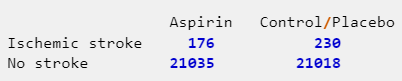

In [11]:
# Пример
# Нулевая гипотеза - эффект аспирина эквивалентен эффекту плацебо

table = np.array([[176, 230], [21035, 21018]])
st.chi2_contingency(table)

# p-value меньше alpha - нет оснований принять нулевую гипотезу - эффект аспирина неэквивалентен эффекту плацебо

Chi2ContingencyResult(statistic=6.892569132546561, pvalue=0.008655478161175739, dof=1, expected_freq=array([[  202.82309993,   203.17690007],
       [21008.17690007, 21044.82309993]]))